In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import os
import DataLoad
import ImagePreprocessor
import Labeling
import TrajectoryPhy

amplif = 2

In [5]:
all_data_path = './data/TrainingSample/all_data'

print(f'Loading the data...')
all_histones = DataLoad.file_distrib(paths=[all_data_path], cutoff=5, chunk=False)[0]
all_histones_label = Labeling.make_label(all_histones, radius=0.45, density=0.4)

n_immo=0
n_hybrid=0
n_mobile=0

for histone in all_histones:
    if all_histones_label[histone] == 0:
        n_immo += 1
    if all_histones_label[histone] == 1:
        n_hybrid += 1
    if all_histones_label[histone] == 2:
        n_mobile += 1
print(f'N_immo:{n_immo},  N_hybrid:{n_hybrid},  N_mobile:{n_mobile} ')

Loading the data...
N_immo:35600,  N_hybrid:3989,  N_mobile:3784 


In [5]:
def make_training_sample(histones, histones_label):
    n_samples = 3500
    immobile_histones = []
    hybrid_histones = []
    mobile_histones = []
    
    for histone in histones:
        if histones_label[histone] == 0:
            immobile_histones.append(histone)
        elif histones_label[histone] == 1:
            hybrid_histones.append(histone)
        else:
            mobile_histones.append(histone)
    immobile_histones = np.array(immobile_histones)
    hybrid_histones = np.array(hybrid_histones)
    mobile_histones = np.array(mobile_histones)
    
    immobile_histones = immobile_histones[np.random.choice(len(immobile_histones), n_samples, replace=False)]
    hybrid_histones = hybrid_histones[np.random.choice(len(hybrid_histones), n_samples, replace=False)]
    mobile_histones = mobile_histones[np.random.choice(len(mobile_histones), n_samples, replace=False)]

    return immobile_histones, hybrid_histones, mobile_histones

In [18]:
def write_training_sample(histones, histones_label):
    immobile_samples, hybrid_samples, mobile_samples = make_training_sample(histones, histones_label)
    with open('./training_sample_no_ir.rpt_tracked.trxyt', 'w') as file:
        for sample in immobile_samples:
            trajectories = histones[sample].get_trajectory()
            t_1 = histones[sample].get_time()
            for i in range(len(trajectories)):
                x, y = trajectories[i]
                time = t_1[i]
                trajec_num = sample.strip().split('.')[0]
                i_string = f'{trajec_num : <25}\t{x : <10}\t{y : <10}\t{time : <4}\n'
                file.write(i_string)
                
        for sample in hybrid_samples:
            trajectories = histones[sample].get_trajectory()
            t_1 = histones[sample].get_time()
            for i in range(len(trajectories)):
                x, y = trajectories[i]
                time = t_1[i]
                trajec_num = sample.strip().split('.')[0]
                i_string = f'{trajec_num : <25}\t{x : <10}\t{y : <10}\t{time : <4}\n'
                file.write(i_string)
                
        for sample in mobile_samples:
            trajectories = histones[sample].get_trajectory()
            t_1 = histones[sample].get_time()
            for i in range(len(trajectories)):
                x, y = trajectories[i]
                time = t_1[i]
                trajec_num = sample.strip().split('.')[0]
                i_string = f'{trajec_num : <25}\t{x : <10}\t{y : <10}\t{time : <4}\n'
                file.write(i_string)
        file.close()

In [19]:
write_training_sample(all_histones, all_histones_label)

In [22]:
data_path = './data/TrainingSample'

print(f'Loading the data...')
histones = DataLoad.file_distrib(paths=[data_path], cutoff=5, all=True, chunk=False)[0][0]
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)

n_immo=0
n_hybrid=0
n_mobile=0

for histone in histones:
    if histones_label[histone] == 0:
        n_immo += 1
    if histones_label[histone] == 1:
        n_hybrid += 1
    if histones_label[histone] == 2:
        n_mobile += 1
print(f'N_immo:{n_immo},  N_hybrid:{n_hybrid},  N_mobile:{n_mobile} ')

Loading the data...
N_immo:3500,  N_hybrid:3500,  N_mobile:3500 


In [4]:
print(f'Image processing...')
histones_channel, nChannel = ImagePreprocessor.make_channel(histones, immobile_cutoff=0.3, hybrid_cutoff=10)
histones_imgs, img_size, time_scale = \
    ImagePreprocessor.preprocessing(histones, histones_channel, img_size=10, amplif=amplif, channel=nChannel)
print(f'Making imgs...')
zoomed_imgs, to_size = ImagePreprocessor.zoom(histones_imgs, size=img_size, to_size=(500, 500))

Image processing...
Making imgs...


In [6]:
reshaped_label = []
reshaped_imgs = []
for histone in zoomed_imgs:
    reshaped_imgs.append(zoomed_imgs[histone].reshape(-1))
    reshaped_label.append(histones_label[histone])
reshaped_imgs = np.array(reshaped_imgs)
print(reshaped_imgs.shape)

(2100, 750000)


In [ ]:
reducer = umap.UMAP(n_neighbors=5)
embedding = reducer.fit_transform(reshaped_imgs)
print(f'Data reducing end')

(2100, 2)


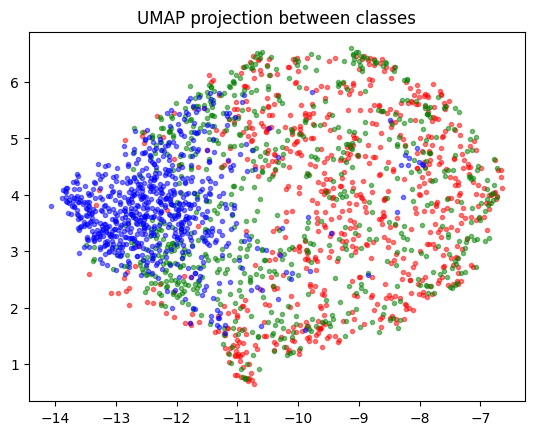

In [17]:
print(embedding.shape)  
color_vec = []
for i in range(len(reshaped_label)):
    if reshaped_label[i] == 0:
        color_vec.append('red')
    elif reshaped_label[i] == 1:
        color_vec.append('green')
    else:
        color_vec.append('blue')
        
fig, ax = plt.subplots()
for p in range(reshaped_imgs.shape[0]):
    ax.scatter(
        embedding[p][0],
        embedding[p][1],
        color=color_vec[p],
        alpha=0.5,
        s=9
    )
plt.title(f'UMAP projection between classes', fontsize=12)
plt.savefig(f'img/training_imgs/1.png')

Image processing...
Making imgs...


KeyboardInterrupt: 

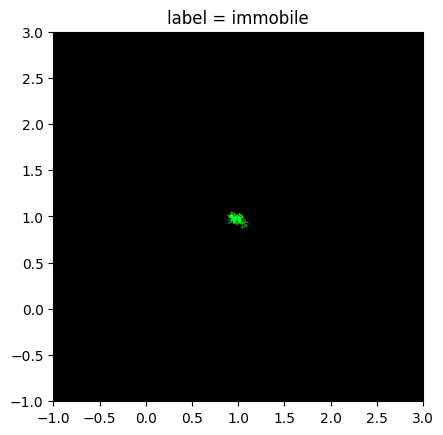

In [9]:
print(f'Image processing...')
histones_channel, nChannel = ImagePreprocessor.make_channel(histones, immobile_cutoff=0.3, hybrid_cutoff=10)
histones_imgs, img_size, time_scale = \
    ImagePreprocessor.preprocessing(histones, histones_channel, img_size=10, amplif=amplif, channel=nChannel)
print(f'Making imgs...')
zoomed_imgs, to_size = ImagePreprocessor.zoom(histones_imgs, size=img_size, to_size=(500, 500))

for i, histone in enumerate(histones):
    histone_first_pos = [int(histones[histone][0][0] * (10 ** amplif)),
                        int(histones[histone][0][1] * (10 ** amplif))]
    channels = histones_channel[histone]
    if histones_label[histone] == 0:
        if i%10 == 10:
            print(f'i={i}')
        ImagePreprocessor.img_save(zoomed_imgs[histone], histone, to_size, label=histones_label[histone],
                                histone_first_pos=histone_first_pos, amplif=amplif, path='img/training_imgs/')

In [ ]:
"""
histones_imgs, img_size, time_scale = img_preprocess.preprocessing3D(histones, img_size=8, amplif=2, channel=False, time_scale=600)
histone_names = np.array(list(histones.keys()))

xs_l = []
ys_l = []
zs_l = []

xs=[]
ys=[]
zs=[]
for i, histone in enumerate(histone_names[:30]):
    print(f'i = {i}')
    for x in range(800):
        for y in range(800):
            for z in range(600):
                if histones_imgs[histone][x][y][z] == 1:
                    xs.append(x)
                    ys.append(y)
                    zs.append(z)
    xs_l.append(xs)
    ys_l.append(ys)
    zs_l.append(zs)

%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(xs_l)):
    ax.scatter(xs_l[i], ys_l[i], zs_l[i])

ax.set_xlabel('X position')
ax.set_ylabel('Y position')
ax.set_zlabel('Time')
plt.savefig('./sample3D.png')
"""

In [ ]:
"""
fig, axs = plt.subplots(2, 1, figsize=(15,15))
i = 0
ax_num = 0
for histone in histone_velocity:
    axs[ax_num].plot(accumulate(histone_velocity[histone]), alpha=0.5, label=str(histone))
    axs[ax_num].legend()
    i += 1
    if i%200 == 0:
        ax_num += 1
    if i==10:
        break

plt.savefig('img/velocity_2.png')
"""

"""
fig, axs = plt.subplots(10, 1, figsize=(15,15))
i = 0
ax_num = 0
for histone in histone_acc:
    axs[ax_num].plot(histone_acc[histone], alpha=0.5, label='A')
    i += 1
    if i%50 == 0:
        ax_num += 1
    if i==500:
        break

plt.savefig('img/acc.png')
"""

"""
fig, axs = plt.subplots(1, 1, figsize=(15,15))
for histone in distances:
    axs.scatter(distances[histone][0] / displacements[histone][0], displacements[histone][1])
    #axs.set_xlim(0, 4)
    #axs.set_ylim(0, 2.5)
plt.savefig('img/mobile_by_fraction.png')
"""

"""
for histone in distances:
    if distances[histone][0] / displacements[histone][0] > 1000:
        print(histone, distances[histone][0] , displacements[histone][0])
        preprocessing(histones[histone], 1)
"""

In [2]:
def read_report(path, amplif):
    with open(path, encoding="utf-8") as f:
        input = f.read()
    lines = input.strip().split('\n')
    ratio = lines[0].strip().split('\n')
    print(ratio)
    classified_histones = []
    for line in lines[1:]:
        info = line.strip().split('\t')
        color = int(info[-4].strip())
        xpos = round(float(info[-2].strip()), amplif)
        ypos = round(float(info[-1].strip()), amplif)
        classified_histones.append(np.array([xpos, ypos, color]))
    return np.array(classified_histones)

In [11]:
def cell_class_map(classified_histones, show):
    plt.figure()
    ax = plt.axes()
    ax.set_facecolor("black")
    #plt.xlim(0,25)
    #plt.ylim(0,25)
    for histone in classified_histones:
        if histone[2] in show:
            if histone[2] == 0:
                c = 'red'
            if histone[2] == 1:
                c = 'yellow'
            if histone[2] == 2:
                c = 'blue'
            plt.scatter(histone[0], histone[1], c=c, s=0.5, alpha=1)


['Immobile:0.8081841432225064, Hybrid:0.13964194373401534, Mobile:0.05217391304347826']


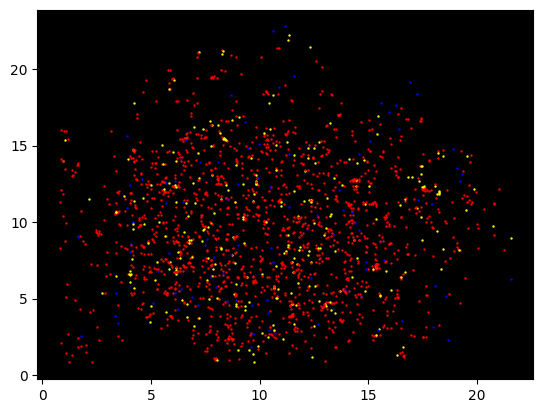

In [12]:
report_path = './result/report_testsample.csv'
classified_histones = read_report(report_path, amplif=2)
cell_class_map(classified_histones, [0,1,2])

['Immobile:0.8782098312545855, Hybrid:0.09537784299339692, Mobile:0.02641232575201761']


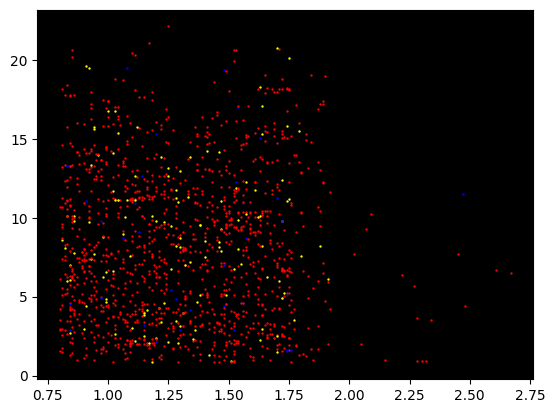

In [13]:
report_path = './result/report_allcrop.csv'
classified_histones = read_report(report_path, amplif=2)
cell_class_map(classified_histones, [0,1,2])

['Immobile:0.7689608915488597, Hybrid:0.17015787844391703, Mobile:0.060881230007223196']


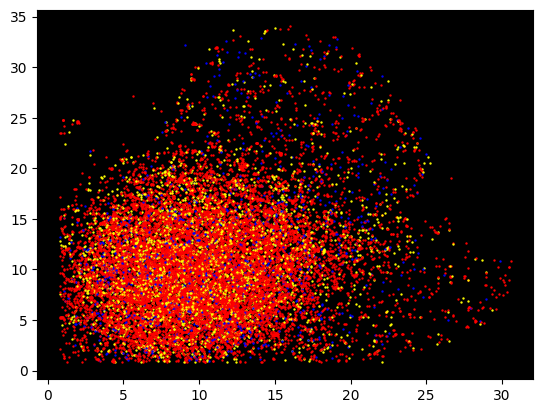

In [14]:
report_path = './result/report_allcell.csv'
classified_histones = read_report(report_path, amplif=2)
cell_class_map(classified_histones, [0,1,2])

['Immobile:0.7853682170542635, Hybrid:0.13565891472868216, Mobile:0.07897286821705427']


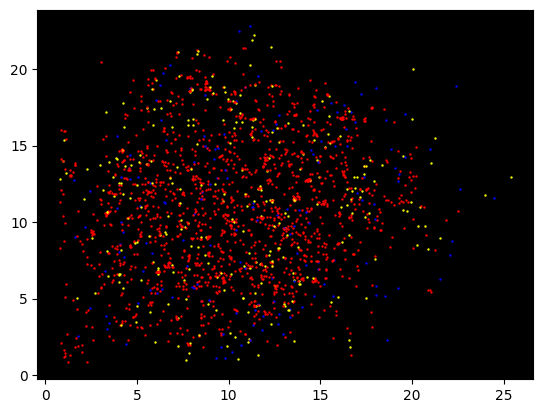

In [15]:
report_path = './result/report_20220217_h2b halo_before_irradiation_entire_Cell.csv'
classified_histones = read_report(report_path, amplif=2)
cell_class_map(classified_histones, [0,1,2])

In [2]:
data_path = './data/scratch/1'

print(f'Loading the data...')
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
TrajectoryPhy.calcul_max_radius(histones)

Loading the data...


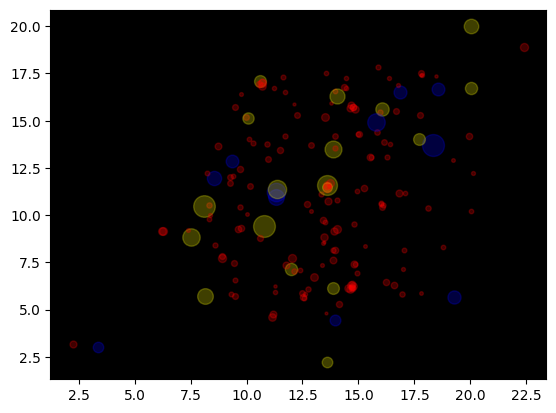

In [3]:
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")

for i, histone in enumerate(histones):
    histone_first_pos = histones[histone].get_trajectory()[0]
    if histones_label[histone] in [0, 1, 2]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        size = histones[histone].get_max_radius()
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=size*100, alpha=0.25)

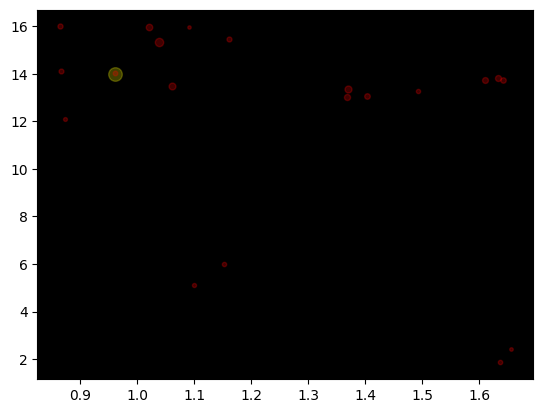

In [4]:
data_path = './data/scratch/2'
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
TrajectoryPhy.calcul_max_radius(histones)
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")
for i, histone in enumerate(histones):
    histone_first_pos = histones[histone].get_trajectory()[0]
    if histones_label[histone] in [0, 1, 2]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        size = histones[histone].get_max_radius()
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=size*100, alpha=0.25)

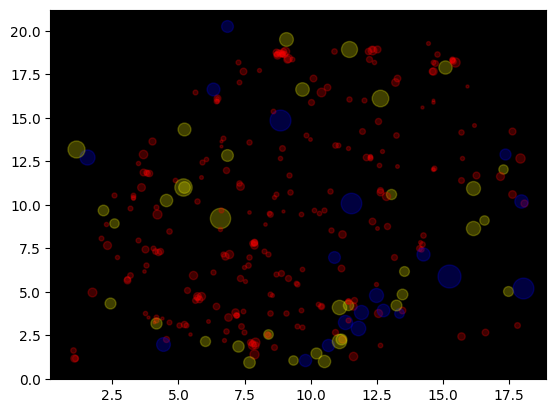

In [5]:
data_path = './data/scratch/3'
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
TrajectoryPhy.calcul_max_radius(histones)
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")
for i, histone in enumerate(histones):
    histone_first_pos = histones[histone].get_trajectory()[0]
    if histones_label[histone] in [0, 1, 2]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        size = histones[histone].get_max_radius()
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=size*100, alpha=0.25)

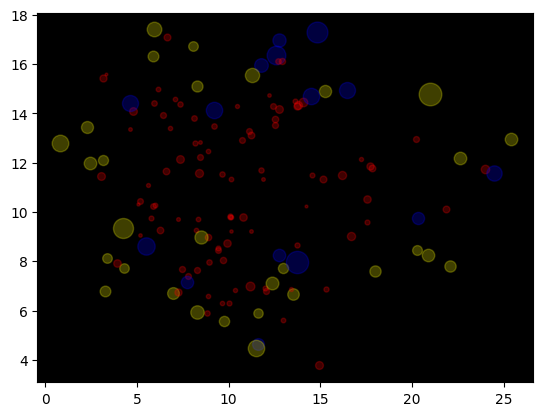

In [6]:
data_path = './data/scratch/4'
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
TrajectoryPhy.calcul_max_radius(histones)
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")
for i, histone in enumerate(histones):
    histone_first_pos = histones[histone].get_trajectory()[0]
    if histones_label[histone] in [0, 1, 2]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        size = histones[histone].get_max_radius()
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=size*100, alpha=0.25)

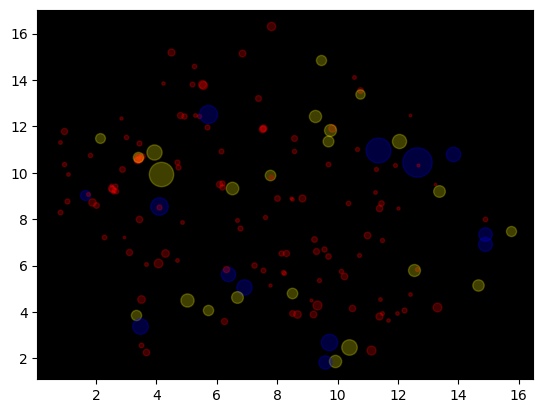

In [7]:
data_path = './data/scratch/5'
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
TrajectoryPhy.calcul_max_radius(histones)
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")
for i, histone in enumerate(histones):
    histone_first_pos = histones[histone].get_trajectory()[0]
    if histones_label[histone] in [0, 1, 2]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        size = histones[histone].get_max_radius()
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=size*100, alpha=0.25)

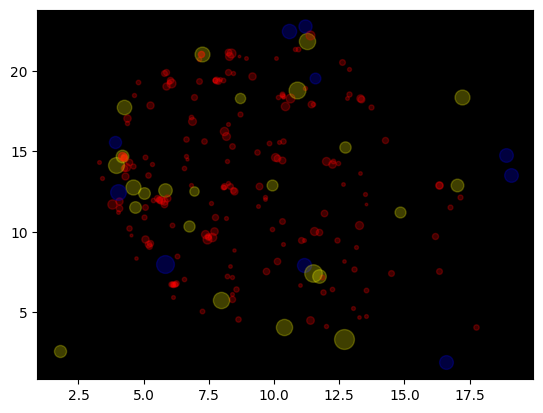

In [8]:
data_path = './data/scratch/6'
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
TrajectoryPhy.calcul_max_radius(histones)
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")
for i, histone in enumerate(histones):
    histone_first_pos = histones[histone].get_trajectory()[0]
    if histones_label[histone] in [0, 1, 2]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        size = histones[histone].get_max_radius()
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=size*100, alpha=0.25)

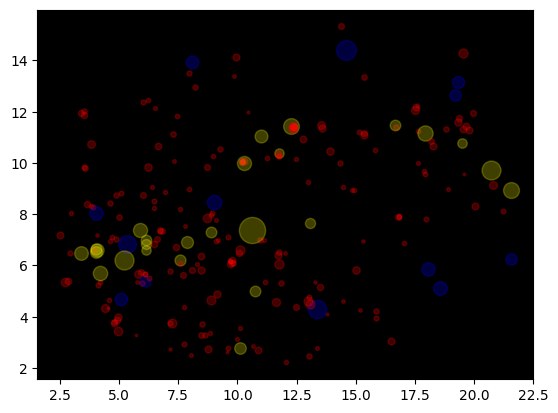

In [9]:
data_path = './data/scratch/7'
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
TrajectoryPhy.calcul_max_radius(histones)
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")
for i, histone in enumerate(histones):
    histone_first_pos = histones[histone].get_trajectory()[0]
    if histones_label[histone] in [0, 1, 2]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        size = histones[histone].get_max_radius()
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=size*100, alpha=0.25)

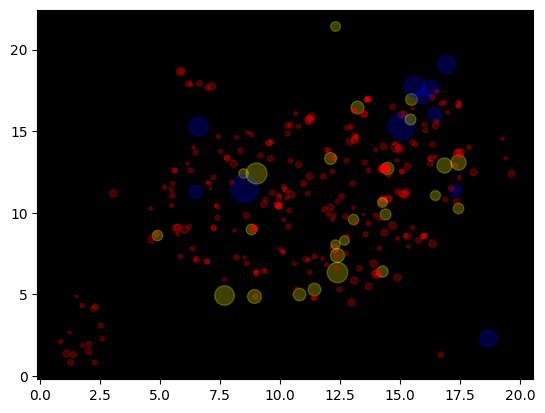

In [10]:
data_path = './data/scratch/8'
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
TrajectoryPhy.calcul_max_radius(histones)
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")
for i, histone in enumerate(histones):
    histone_first_pos = histones[histone].get_trajectory()[0]
    if histones_label[histone] in [0, 1, 2]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        size = histones[histone].get_max_radius()
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=size*100, alpha=0.25)

In [ ]:
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")

for i, histone in enumerate(histones):
    histone_first_pos = histones[histone].get_trajectory()[0]
    if histones_label[histone] in [0]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        size = histones[histone].get_max_radius()
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=size*100, alpha=0.2)
plt.xlim(0,25)
plt.ylim(0,25)

(0.0, 25.0)

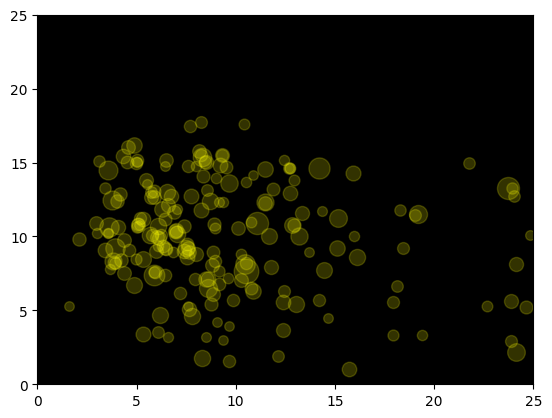

In [8]:
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")

for i, histone in enumerate(histones):
    histone_first_pos = [histones[histone][0][0], histones[histone][0][1]]
    if histones_label[histone] in [1]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=histone_max_dist[histone]*100, alpha=0.2)
plt.xlim(0,25)
plt.ylim(0,25)

(0.0, 25.0)

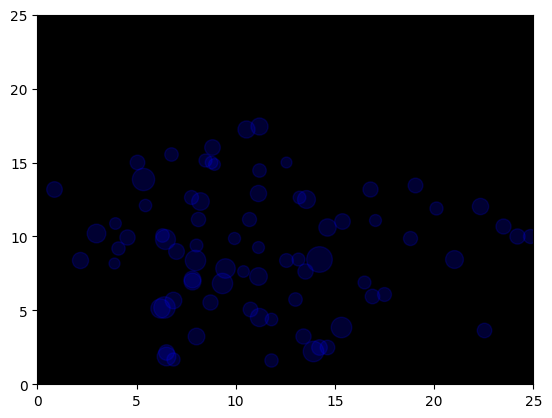

In [9]:
plt.figure()
ax = plt.axes()
ax.set_facecolor("black")

for i, histone in enumerate(histones):
    histone_first_pos = [histones[histone][0][0], histones[histone][0][1]]
    if histones_label[histone] in [2]:
        if histones_label[histone] == 0:
            c = 'red'
        if histones_label[histone] == 1:
            c = 'yellow'
        if histones_label[histone] == 2:
            c = 'blue'
        plt.scatter(histone_first_pos[0], histone_first_pos[1], c=c, s=histone_max_dist[histone]*100, alpha=0.2)
plt.xlim(0,25)
plt.ylim(0,25)


Loading the data...
Image processing...
Number of training items:2400, processed shape:(500, 500), time scale:None



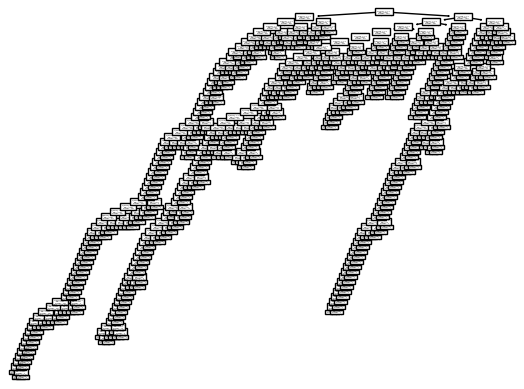

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import ImagePreprocessor
import Labeling
import DataLoad
import numpy as np
from sklearn import tree


data_path = 'data/TrainingSample'


if __name__ == '__main__':
    nChannel = 3
    print(f'\nLoading the data...')
    histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
    histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
    print(f'Image processing...')
    ImagePreprocessor.make_channel(histones, immobile_cutoff=0.3, hybrid_cutoff=10, nChannel=nChannel)
    histones_imgs, img_size, time_scale = ImagePreprocessor.preprocessing(histones, img_scale=10, amp=2)
    zoomed_imgs, scaled_size = ImagePreprocessor.zoom(histones_imgs, size=img_size, to_size=(500, 500))
    print(f'Number of training items:{len(zoomed_imgs)}, processed shape:{scaled_size}, time scale:{time_scale}\n')

    clf = tree.DecisionTreeClassifier()

    X = []
    Y = []
    for histone in histones:
        var = zoomed_imgs[histone]
        var = var.reshape(500 * 500 * 3)
        X.append(var)
        Y.append(histones_label[histone])
    X = np.array(X)

    clf = clf.fit(X, Y)
    tree.plot_tree(clf)

In [3]:
from sklearn.tree import export_text
r= export_text(clf)
print(r)

|--- feature_375751 <= 0.50
|   |--- feature_369772 <= 0.50
|   |   |--- feature_381751 <= 0.50
|   |   |   |--- feature_380233 <= 0.50
|   |   |   |   |--- feature_369760 <= 0.50
|   |   |   |   |   |--- feature_387712 <= 0.50
|   |   |   |   |   |   |--- feature_378719 <= 0.50
|   |   |   |   |   |   |   |--- feature_377299 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_393754 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_353264 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_384757 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 63
|   |   |   |   |   |   |   |   |   |   |--- feature_384757 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_353264 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_351784 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   

In [14]:
data_path = 'data/TestSample'

nChannel = 3
print(f'\nLoading the data...')
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
print(f'Image processing...')
ImagePreprocessor.make_channel(histones, immobile_cutoff=0.3, hybrid_cutoff=10, nChannel=nChannel)
histones_imgs, img_size, time_scale = ImagePreprocessor.preprocessing(histones, img_scale=10, amp=2)
zoomed_imgs, scaled_size = ImagePreprocessor.zoom(histones_imgs, size=img_size, to_size=(500, 500))
print(f'Number of training items:{len(zoomed_imgs)}, processed shape:{scaled_size}, time scale:{time_scale}\n')

X = []
Y = []
for histone in histones:
    var = zoomed_imgs[histone]
    var = var.reshape(500 * 500 * 3)
    X.append(var)
    Y.append(histones_label[histone])
X = np.array(X)
Y = np.array(Y)

y_predict = clf.predict(X)
print('Accuracy = ', np.sum([1 if x == 0 else 0 for x in (Y.reshape(-1) - y_predict)]) / float(y_predict.shape[0]))


Loading the data...
Image processing...
Number of training items:1955, processed shape:(500, 500), time scale:None

Accuracy =  0.6982097186700768


In [1]:
import os
import ImagePreprocessor
import Labeling
import DataLoad
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree


Loading the data...
(10500, 8)
(10500,)
Accuracy =  0.8785714285714286


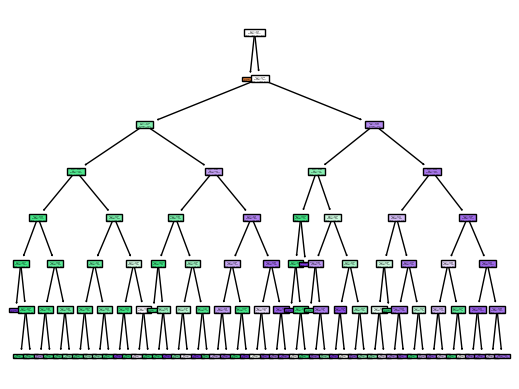

In [3]:
data_path = './data/TrainingSample'

if __name__ == '__main__':
    nChannel = 3
    print(f'\nLoading the data...')
    histones = DataLoad.file_distrib(paths=[data_path], cutoff=5, chunk=False)[0]
    histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
    
    trainable_histones_X = []
    trainable_histones_Y = []
    for histone in histones:
        traj = np.array(histones[histone].get_trajectory())
        time = np.array(histones[histone].get_time())
        speed = []
        prev_xy = traj[0]
        for index in range(len(traj)):
            grad = (traj[index] - prev_xy)
            prev_xy = traj[index]
            speed.append(np.sqrt(grad[0]**2 + grad[1]**2)/time[index])
  
        x_std = np.std(traj[:,0])
        y_std = np.std(traj[:,1])
        x_mean = np.mean(traj[:,0])
        y_mean = np.mean(traj[:,1])
        x_median = np.median(traj[:,0])
        y_median = np.median(traj[:,1])
        avg_speed = np.mean(speed)
        
        trainable_histones_X.append([x_std, y_std, x_mean, y_mean, x_median, y_median,
                                     avg_speed, histones[histone].get_max_radius()])
        trainable_histones_Y.append(int(histones_label[histone]))
    trainable_histones_X = np.array(trainable_histones_X)
    trainable_histones_Y = np.array(trainable_histones_Y)
    print(trainable_histones_X.shape)
    print(trainable_histones_Y.shape)
                                   

    clf = tree.DecisionTreeClassifier(max_depth=7)

    clf = clf.fit(trainable_histones_X, trainable_histones_Y)
    plt.figure()
    tree.plot_tree(clf, filled=True)
    plt.savefig('./decision_tree.png', dpi=400)
    
    y_predict = clf.predict(trainable_histones_X)
    print('Accuracy = ', np.sum([1 if x == 0 else 0 for x in (trainable_histones_Y.reshape(-1) - y_predict)]) / float(y_predict.shape[0]))

In [4]:
pred_data = './data/TrainingSample/all_data'

if __name__ == '__main__':
    nChannel = 3
    histones = DataLoad.file_distrib(paths=[pred_data], cutoff=5, chunk=False)[0]
    histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
    
    pred_histones_X = []
    pred_histones_Y = []
    for histone in histones:
        traj = np.array(histones[histone].get_trajectory())
        time = np.array(histones[histone].get_time())
        speed = []
        prev_xy = traj[0]
        for index in range(len(traj)):
            grad = (traj[index] - prev_xy)
            prev_xy = traj[index]
            speed.append(np.sqrt(grad[0]**2 + grad[1]**2)/time[index])
  
        x_std = np.std(traj[:,0])
        y_std = np.std(traj[:,1])
        x_mean = np.mean(traj[:,0])
        y_mean = np.mean(traj[:,1])
        x_median = np.median(traj[:,0])
        y_median = np.median(traj[:,1])
        avg_speed = np.mean(speed)
        
        pred_histones_X.append([x_std, y_std, x_mean, y_mean, x_median, y_median,
                                     avg_speed, histones[histone].get_max_radius()])
        pred_histones_Y.append(int(histones_label[histone]))
    pred_histones_X = np.array(pred_histones_X)
    pred_histones_Y = np.array(pred_histones_Y)                         

    y_predict = clf.predict(pred_histones_X)
    print('Accuracy = ', np.sum([1 if x == 0 else 0 for x in (pred_histones_Y.reshape(-1) - y_predict)]) / float(y_predict.shape[0]))

Accuracy =  0.9669379567933968


In [6]:
print(len(histones))

43373


In [1]:
import os
import ImagePreprocessor
import Labeling
import DataLoad
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
def random_forest_training(depth:int) -> tuple:
    data_path = './data/TrainingSample'
    nChannel = 3
    histones = DataLoad.file_distrib(paths=[data_path], cutoff=5, chunk=False)[0]
    histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
    
    trainable_histones_X = []
    trainable_histones_Y = []
    for histone in histones:
        traj = np.array(histones[histone].get_trajectory())
        time = np.array(histones[histone].get_time())
        speed = []
        prev_xy = traj[0]
        for index in range(len(traj)):
            grad = (traj[index] - prev_xy)
            prev_xy = traj[index]
            speed.append(np.sqrt(grad[0]**2 + grad[1]**2)/time[index])
  
        x_std = np.std(traj[:,0])
        y_std = np.std(traj[:,1])
        x_mean = np.mean(traj[:,0])
        y_mean = np.mean(traj[:,1])
        x_median = np.median(traj[:,0])
        y_median = np.median(traj[:,1])
        avg_speed = np.mean(speed)
        
        trainable_histones_X.append([x_std, y_std, x_mean, y_mean, x_median, y_median,
                                     avg_speed, histones[histone].get_max_radius()])
        trainable_histones_Y.append(int(histones_label[histone]))
    trainable_histones_X = np.array(trainable_histones_X)
    trainable_histones_Y = np.array(trainable_histones_Y)                    

    clf = RandomForestClassifier(max_depth=depth)

    clf = clf.fit(trainable_histones_X, trainable_histones_Y)
    #plt.figure()
    #tree.plot_tree(clf, filled=True)
    #plt.savefig('./random_forest.png', dpi=400)
    
    y_predict = clf.predict(trainable_histones_X)
    acc_train = np.sum([1 if x == 0 else 0 for x in (trainable_histones_Y.reshape(-1) - y_predict)]) / float(y_predict.shape[0])
    print('Accuracy in training set = ', acc_train)
    return acc_train, clf

In [3]:
def random_forest_prediction(clf) -> int:
    pred_data = './data/TrainingSample/all_data'
    nChannel = 3
    histones = DataLoad.file_distrib(paths=[pred_data], cutoff=5, chunk=False)[0]
    histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)
    
    pred_histones_X = []
    pred_histones_Y = []
    for histone in histones:
        traj = np.array(histones[histone].get_trajectory())
        time = np.array(histones[histone].get_time())
        speed = []
        prev_xy = traj[0]
        for index in range(len(traj)):
            grad = (traj[index] - prev_xy)
            prev_xy = traj[index]
            speed.append(np.sqrt(grad[0]**2 + grad[1]**2)/time[index])
  
        x_std = np.std(traj[:,0])
        y_std = np.std(traj[:,1])
        x_mean = np.mean(traj[:,0])
        y_mean = np.mean(traj[:,1])
        x_median = np.median(traj[:,0])
        y_median = np.median(traj[:,1])
        avg_speed = np.mean(speed)
        
        pred_histones_X.append([x_std, y_std, x_mean, y_mean, x_median, y_median,
                                     avg_speed, histones[histone].get_max_radius()])
        pred_histones_Y.append(int(histones_label[histone]))
    pred_histones_X = np.array(pred_histones_X)
    pred_histones_Y = np.array(pred_histones_Y)                         

    y_predict = clf.predict(pred_histones_X)
    acc_pred = np.sum([1 if x == 0 else 0 for x in (pred_histones_Y.reshape(-1) - y_predict)]) / float(y_predict.shape[0])
    print('Accuracy in test set = ', acc_pred)
    return acc_pred

In [ ]:
training_acc = []
pred_acc = []
for depth in range(1, 20):
    print('Working on the depth=',depth)
    tr_acc, clf = random_forest_training(depth)
    training_acc.append(tr_acc)
    pred_acc.append(random_forest_prediction(clf))
    
print(training_acc)
print(pred_acc)

Working on the depth= 5
Accuracy in training set =  0.8694285714285714
Working on the depth= 10
Accuracy in training set =  0.9046666666666666
Working on the depth= 15
Accuracy in training set =  0.96


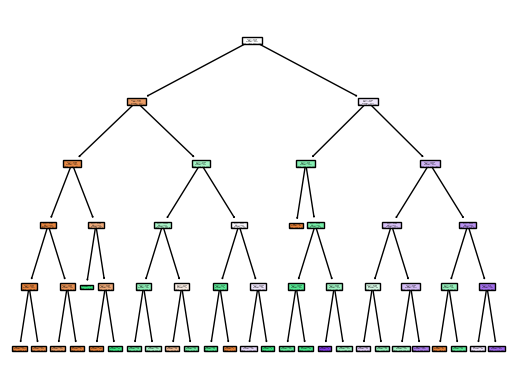

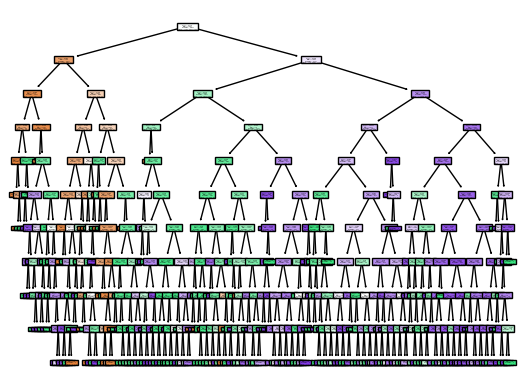

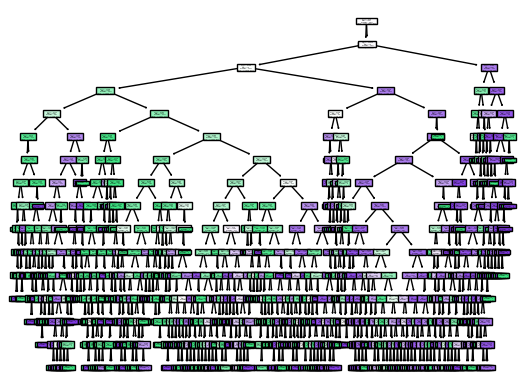

In [5]:
for depth in [5,10,15]:
    print('Working on the depth=',depth)
    tr_acc, clf = random_forest_training(depth)
    plt.figure()
    tree.plot_tree(clf.estimators_[0], filled=True)
    plt.savefig(f'./decision_tree_{depth}.png', dpi=400)

In [1]:
acc_train = [0.7594285714285715, 0.8499047619047619, 0.8628571428571429, 0.8636190476190476, 0.87, 0.8742857142857143, 0.8789523809523809, 0.8852380952380953, 0.8949523809523809, 0.9056190476190477, 0.9152380952380952, 0.9274285714285714, 0.9378095238095238, 0.9496190476190476, 0.9580952380952381, 0.9686666666666667, 0.975047619047619, 0.9854285714285714, 0.9896190476190476]

In [2]:
acc_pred = [0.9337145228598437, 0.9592834251723422, 0.9626956862564268, 0.9629262444377839, 0.9646554307979619, 0.9656929426140687, 0.9670762917022111, 0.968574919881032, 0.9710188366034169, 0.9736702556890231, 0.9761372282295437, 0.9792497636778641, 0.981693680400249, 0.9846909367578909, 0.986719848753833, 0.9892329329306251, 0.9910082309270745, 0.9934290918313237, 0.9944896594655661]

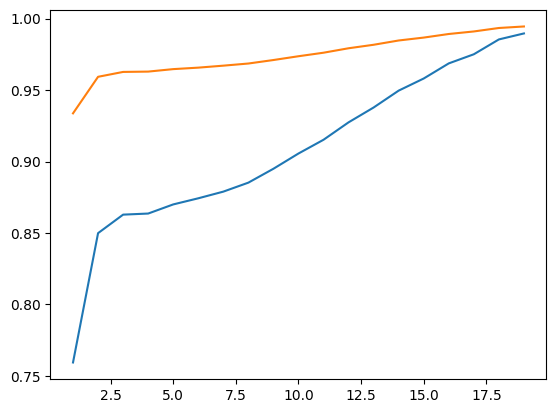

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1,20), acc_train)
plt.plot(range(1,20), acc_pred)
plt.show()